In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
SAMPLING_FREQ = 200

In [148]:
# load the data from csv files
def load_from_fragments(name):
    path = name + '_fragmentized.csv'
    data = pd.read_csv(path)
    return data

def compute_fft(data, sampling_freq):
    # Compute the length of the signal
    N = len(data)
    
    # Compute the frequencies corresponding to the FFT
    freqs = np.fft.fftfreq(N, d=1/sampling_freq)
    
    # Compute the FFT of the data
    fft_vals = np.fft.fft(data)
    
    return freqs, fft_vals

def plot_data(data, fragment_size):
    fig = plt.figure(figsize=(20, 30))
    gs = fig.add_gridspec(data.shape[0], 1, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    # create and array of 14 colors
    colors = plt.cm.viridis(np.linspace(0, 1, 14))
    for i in range(data.shape[0]):
        ax = plt.subplot(data.shape[0], 1, i+1)
        plt.ylabel(data.index[i])
        plt.plot(data.iloc[i, :])
        plt.grid()
        # remove the numbers on the y axis
        plt.yticks([])
        for j in range(14):
            plt.axvline(x=sum(fragment_size[:j]), color='red', linestyle='--')
        plt.axvline(x=sum(fragment_size), color='red', linestyle='--')
        # apply the  background color for each of the fragments
        for j in range(14):
            ax.axvspan(sum(fragment_size[:j]), sum(fragment_size[:j+1]), facecolor=colors[j], alpha=0.5)

    for ax in axs:
        ax.label_outer()

    plt.tight_layout()
    plt.show()

In [149]:
# load the data
data_029b0RMT = load_from_fragments('029b0RMT')
data_117h0RMT = load_from_fragments('117h0RMT')
fragment_size_029b0RMT = []
for i in range(1, 15):
    fragment_size_029b0RMT.append(len(data_029b0RMT[data_029b0RMT['fragment'] == i]))

fragment_size_117h0RMT = []
for i in range(1, 15):
    fragment_size_117h0RMT.append(len(data_117h0RMT[data_117h0RMT['fragment'] == i]))

data_029b0RMT = data_029b0RMT.drop(columns=['fragment'])
data_117h0RMT = data_117h0RMT.drop(columns=['fragment'])

data_029b0RMT = data_029b0RMT.T
data_117h0RMT = data_117h0RMT.T


In [150]:
data_029b0RMT.shape[0]

42

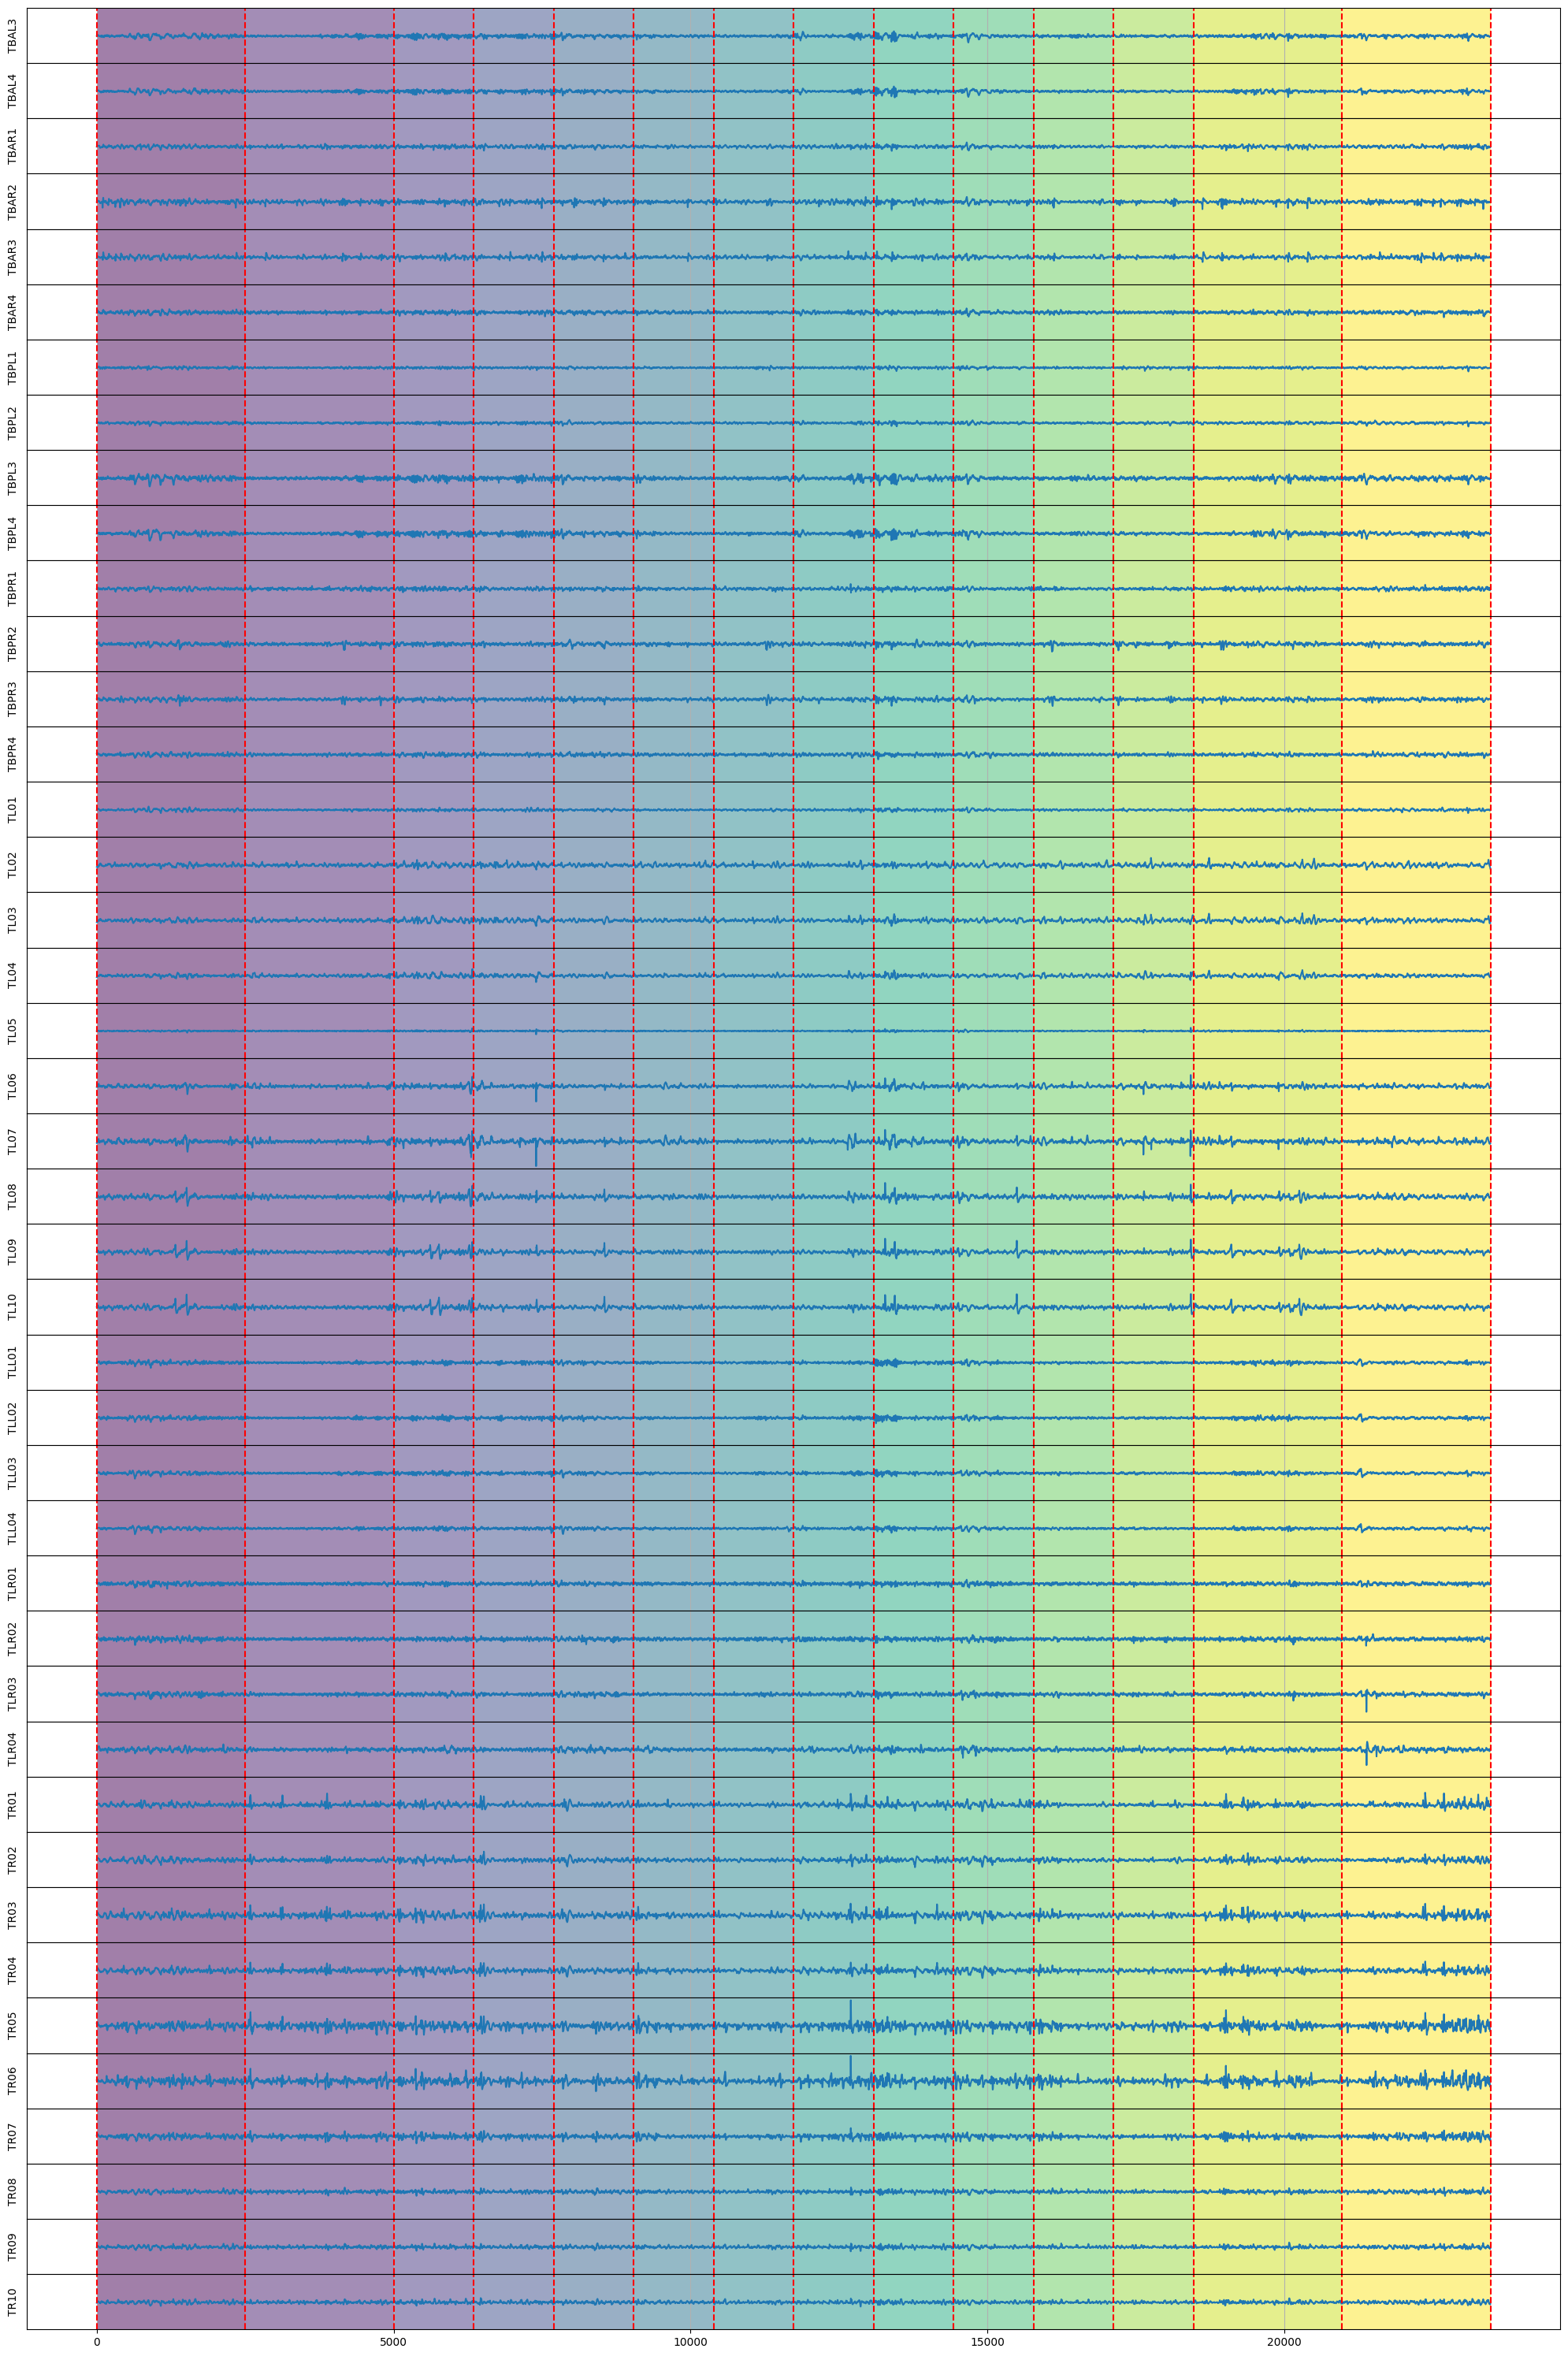

In [151]:
plot_data(data_029b0RMT, fragment_size_029b0RMT)

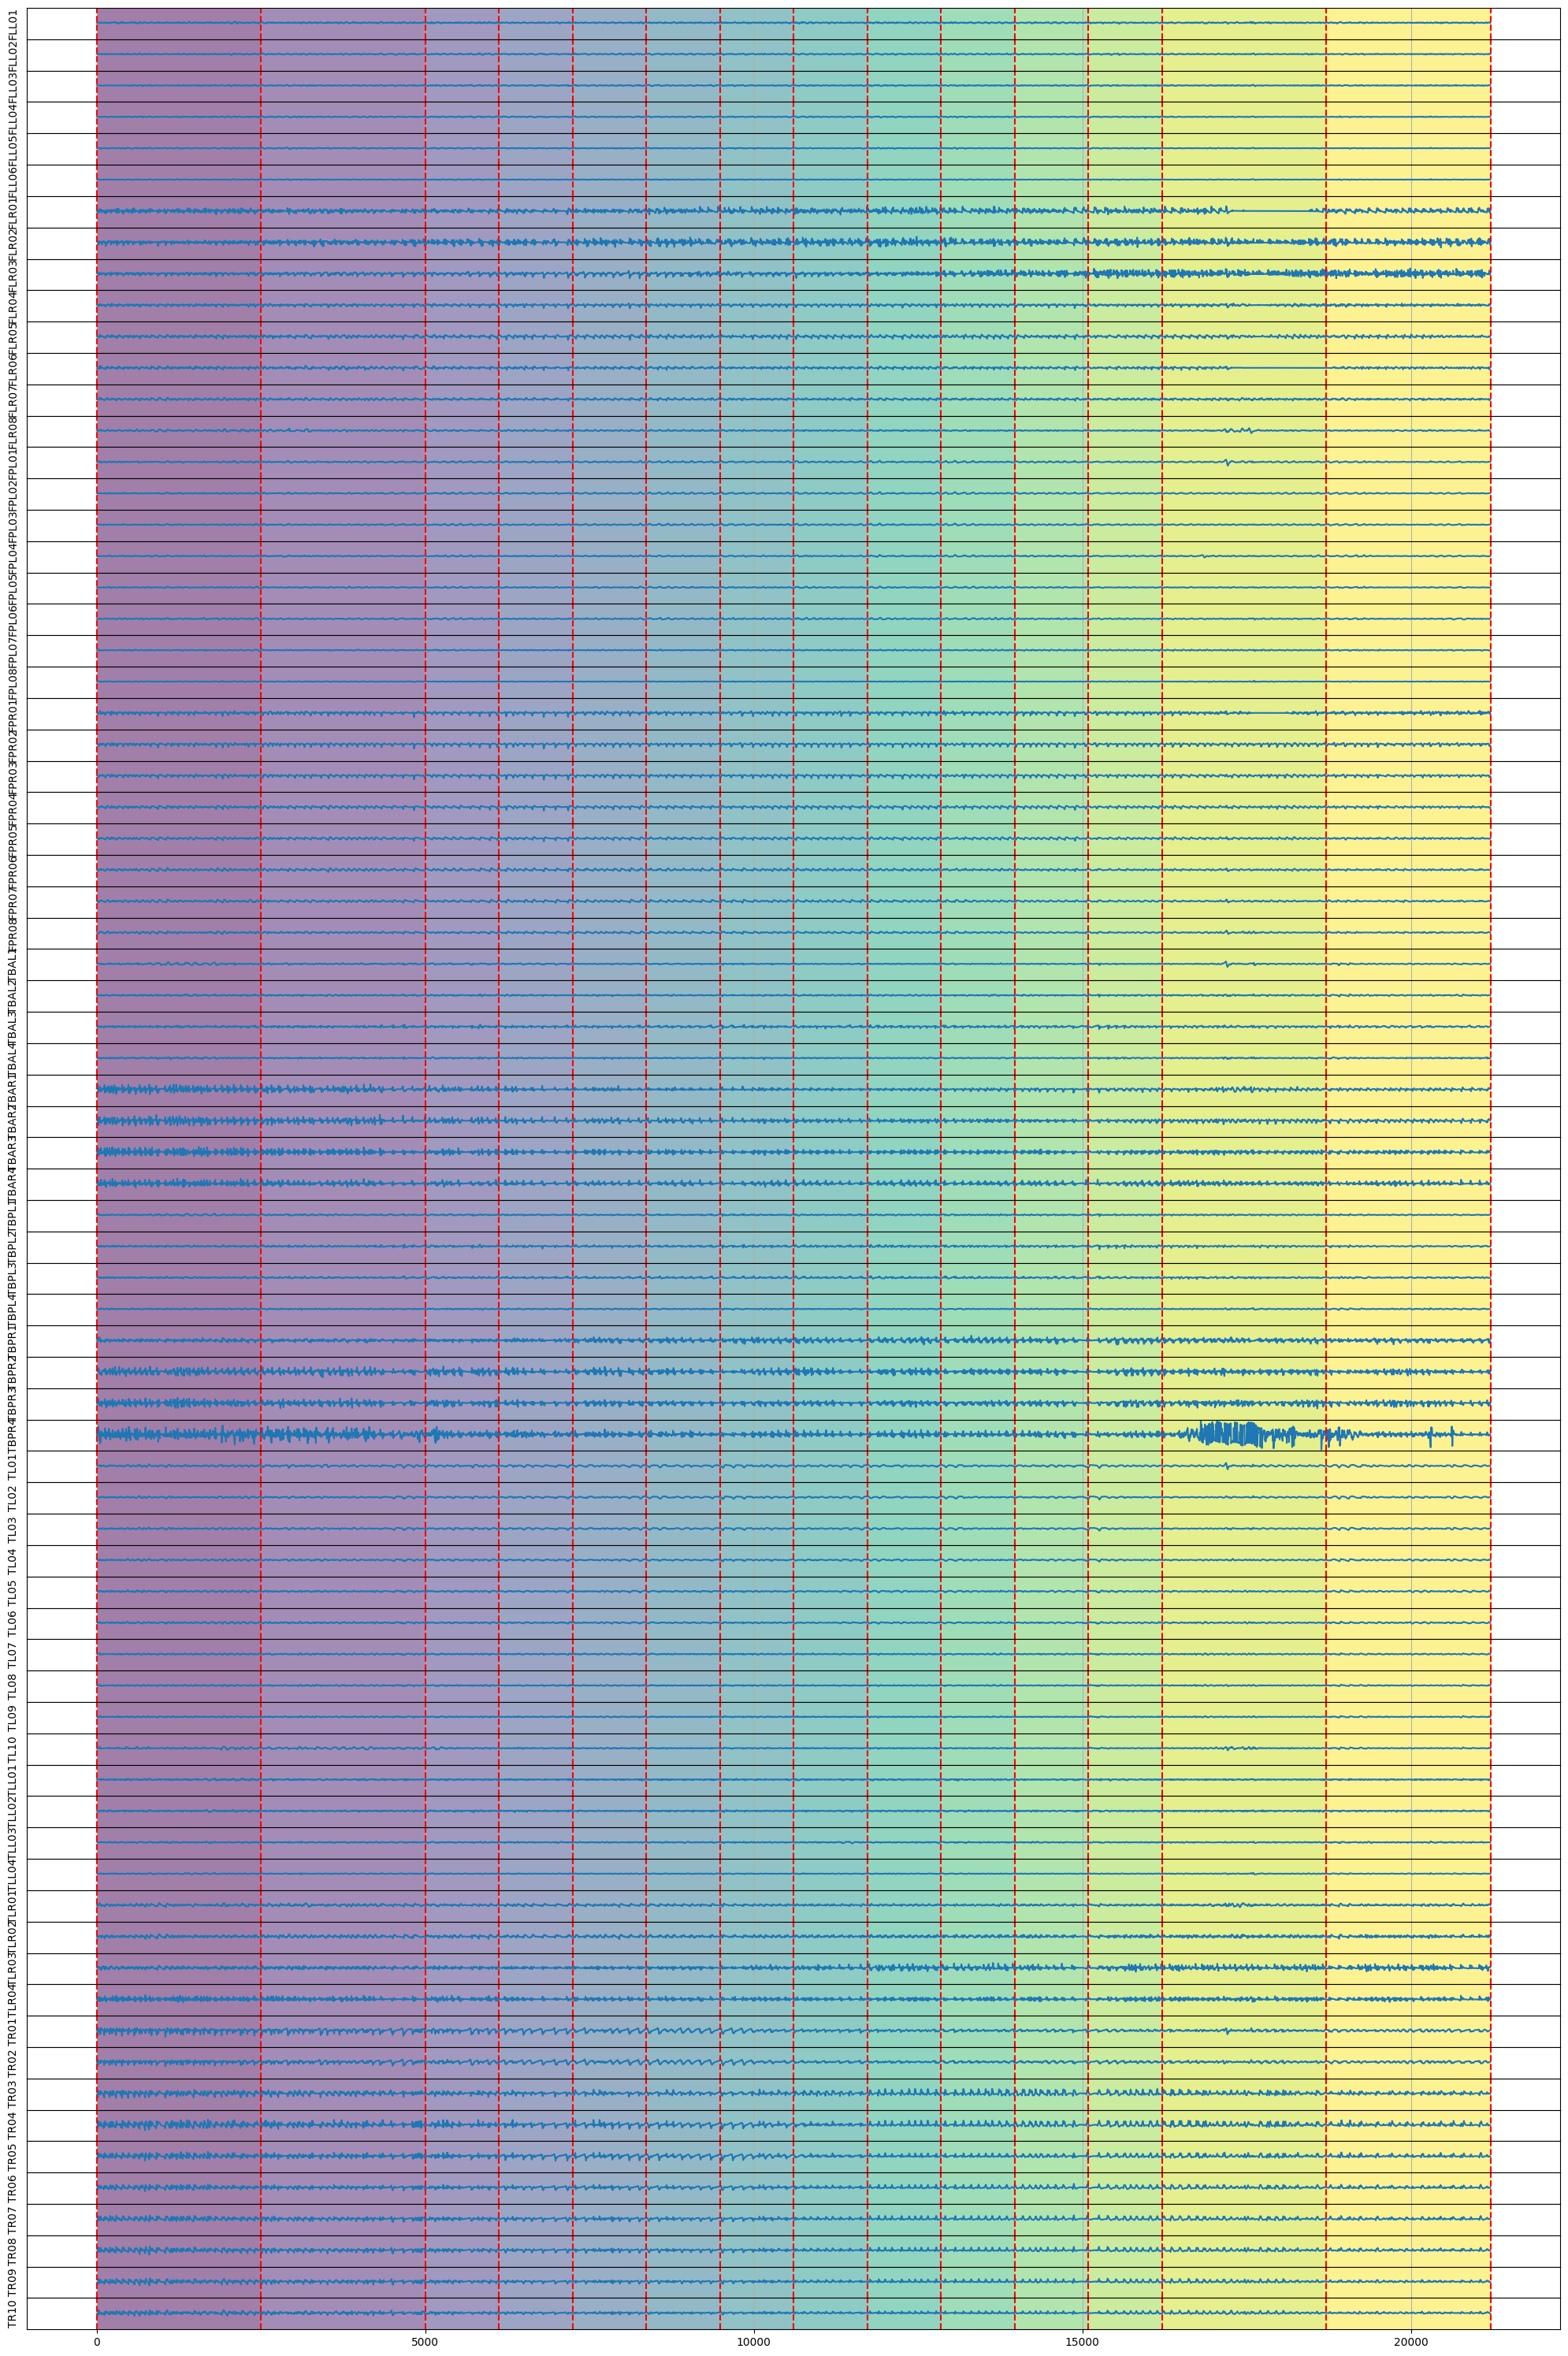

In [152]:
plot_data(data_117h0RMT, fragment_size_117h0RMT)

/tmp/ipykernel_12891/1147120169.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fft_data_029b0RMT = fft_data_029b0RMT.append(pd.Series(fft_vals), ignore_index=True)
/home/sunny/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


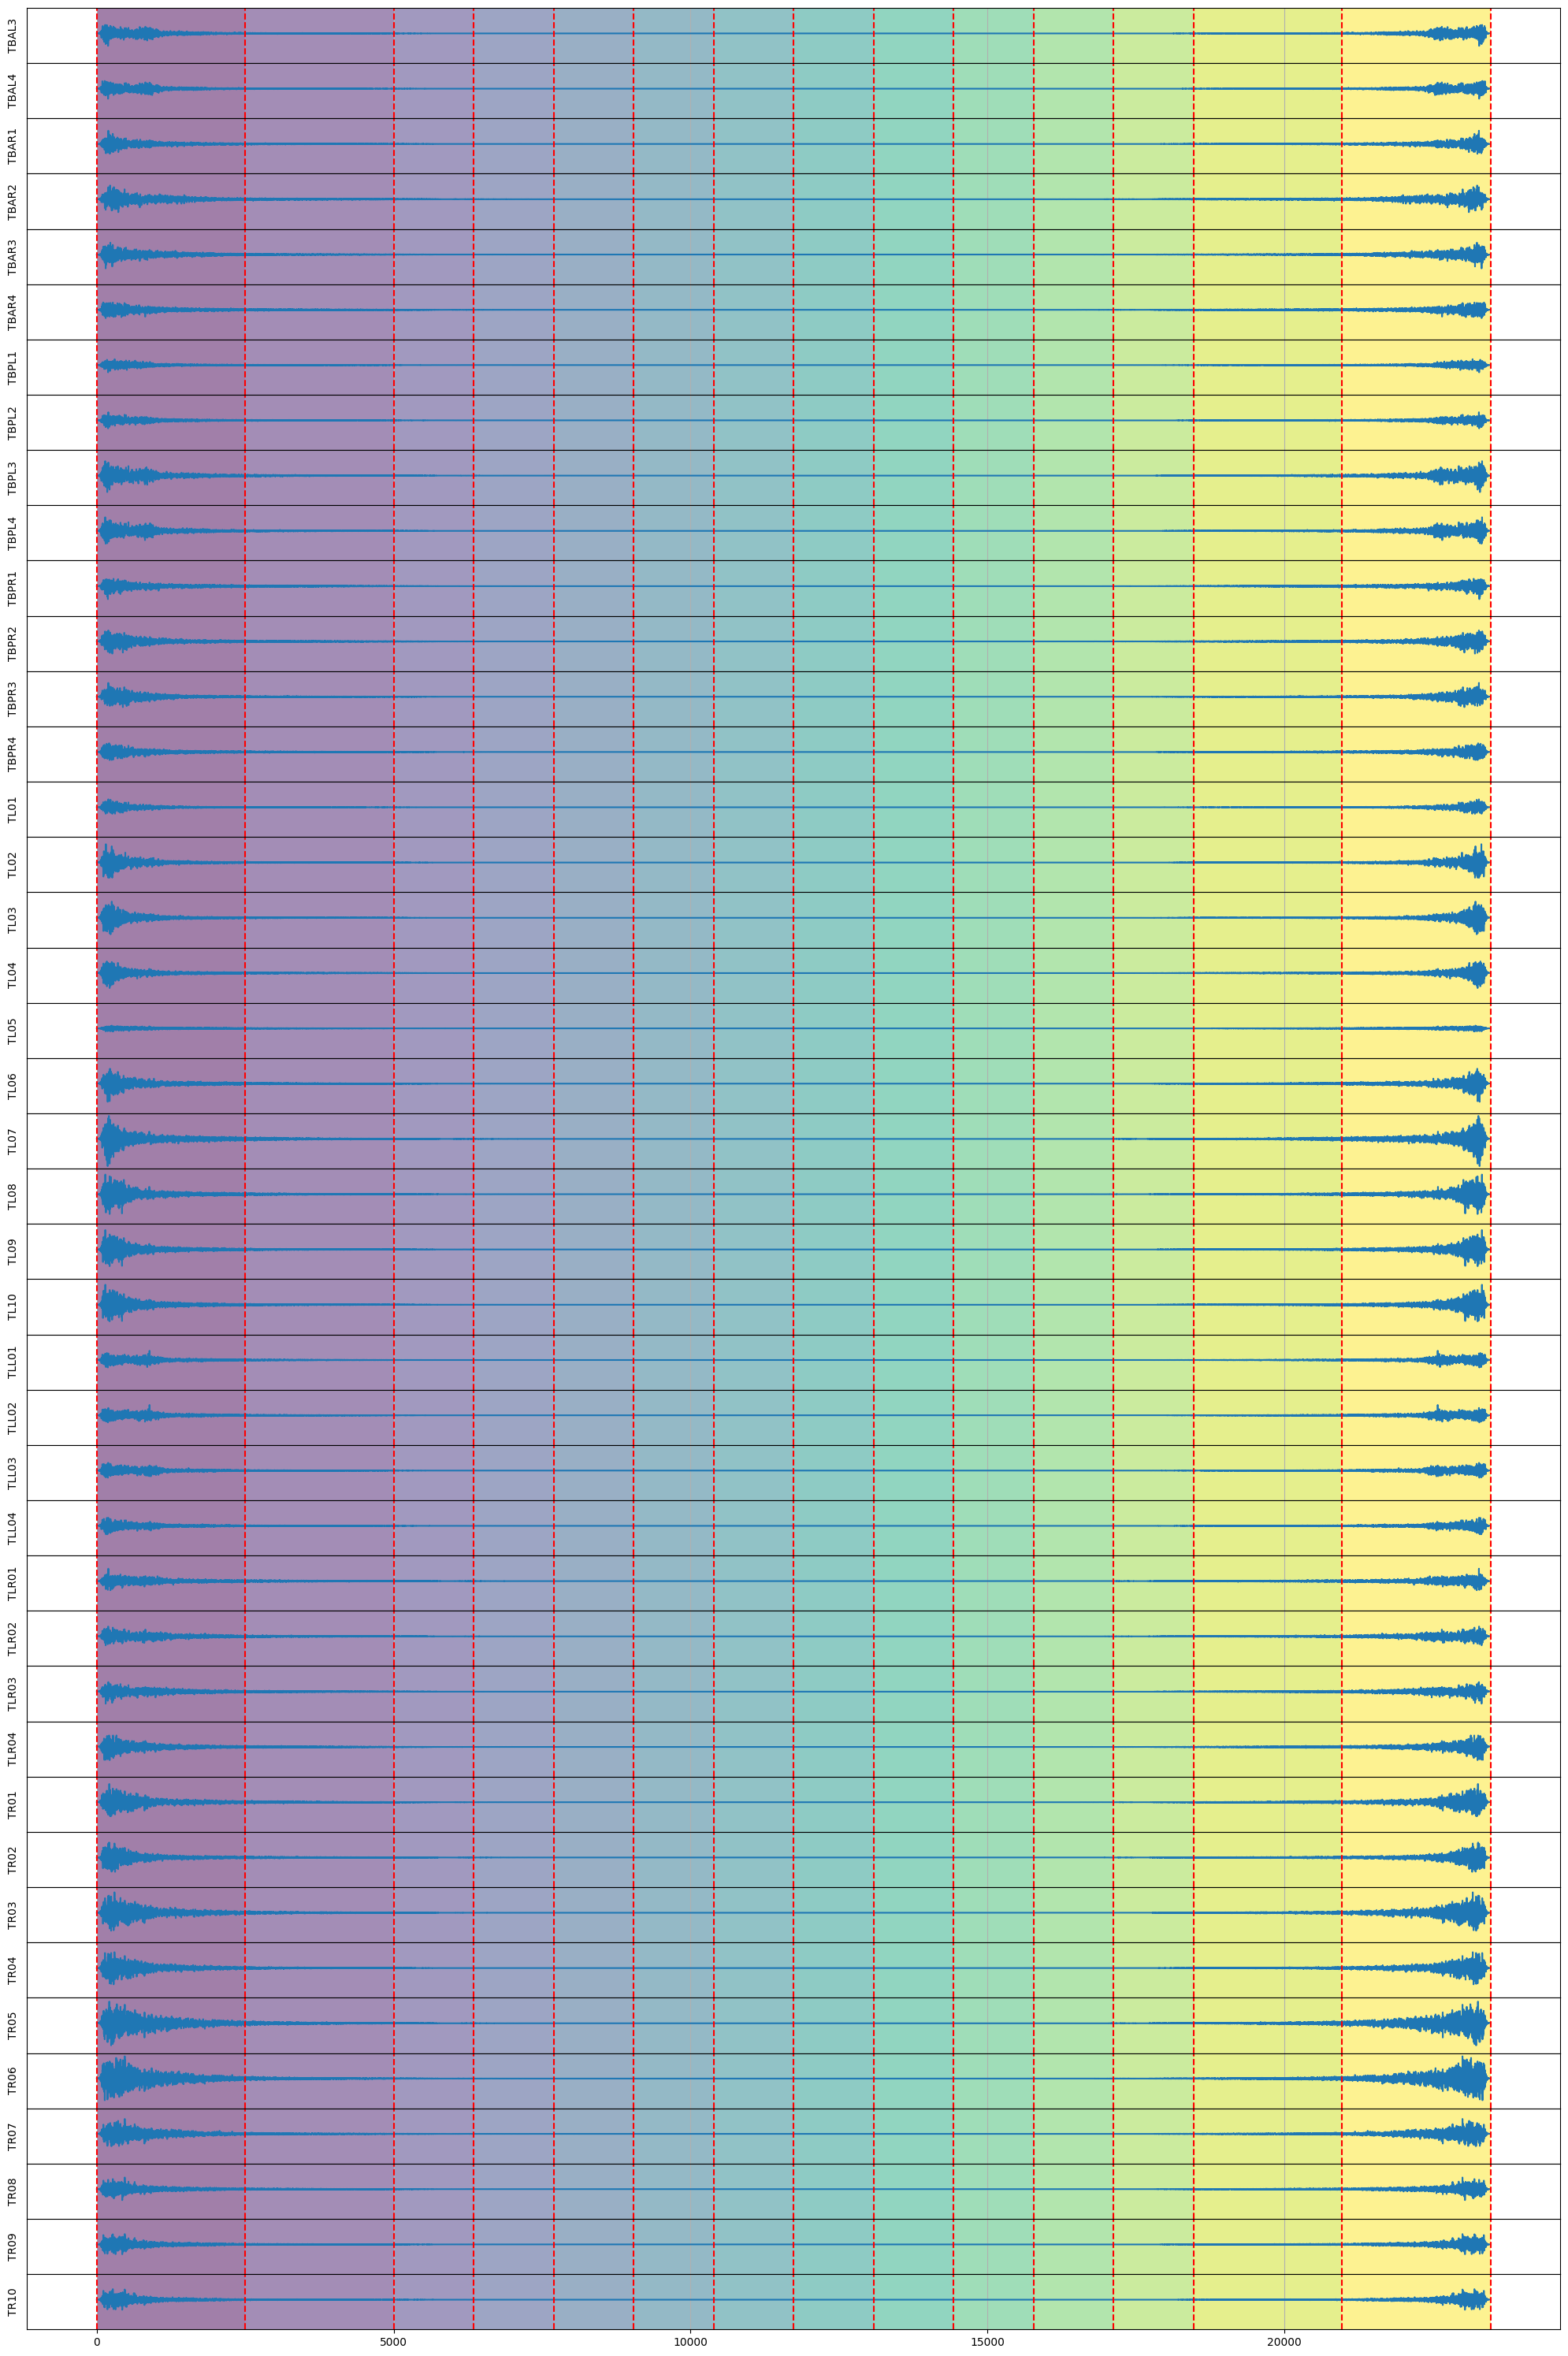

In [153]:
# create a new df 'fft_data_029b0RMT' to store the fft values
fft_data_029b0RMT = pd.DataFrame()
for i in range(data_029b0RMT.shape[0]):
    freqs, fft_vals = compute_fft(data_029b0RMT.iloc[i, :], SAMPLING_FREQ)
    fft_data_029b0RMT = fft_data_029b0RMT.append(pd.Series(fft_vals), ignore_index=True)

# use the same index as the original data
fft_data_029b0RMT.index = data_029b0RMT.index

# plot the fft data
plot_data(fft_data_029b0RMT, fragment_size_029b0RMT)

/tmp/ipykernel_12891/1846746287.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fft_data_117h0RMT = fft_data_117h0RMT.append(pd.Series(fft_vals), ignore_index=True)


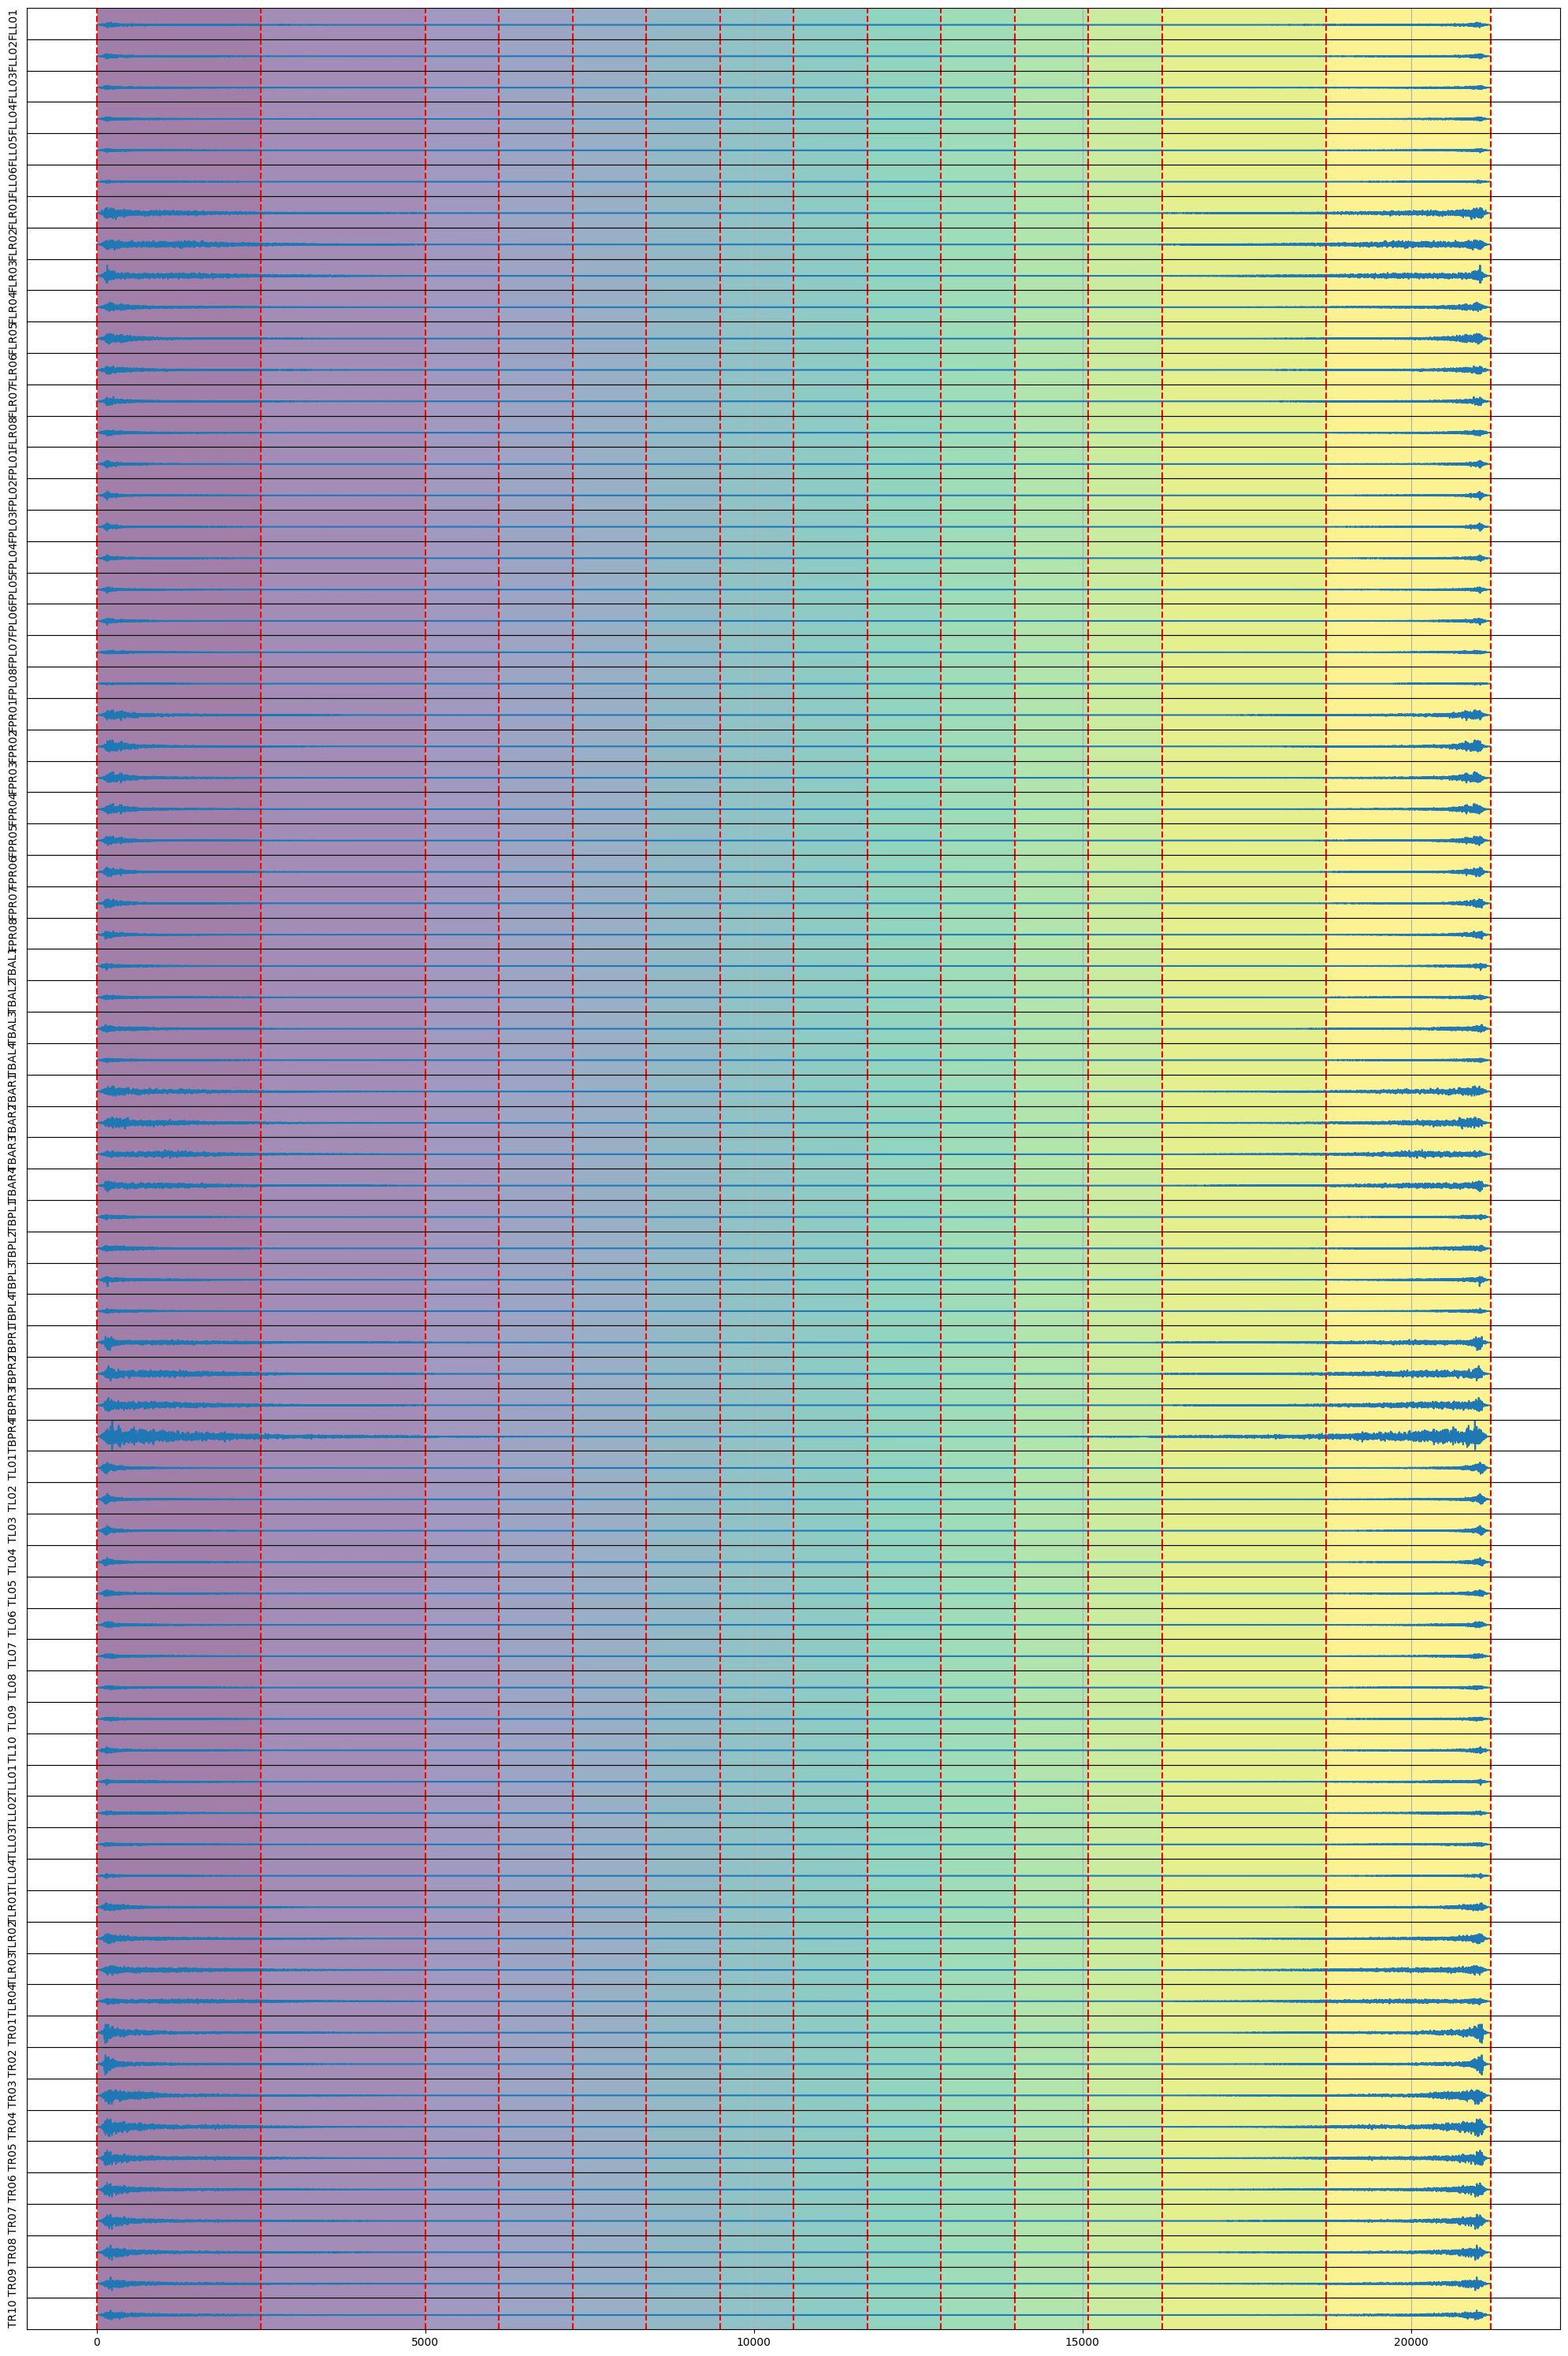

In [154]:
# create a new df 'fft_data_117h0RMT' to store the fft values
fft_data_117h0RMT = pd.DataFrame()
for i in range(data_117h0RMT.shape[0]):
    freqs, fft_vals = compute_fft(data_117h0RMT.iloc[i, :], SAMPLING_FREQ)
    fft_data_117h0RMT = fft_data_117h0RMT.append(pd.Series(fft_vals), ignore_index=True)

# use the same index as the original data
fft_data_117h0RMT.index = data_117h0RMT.index

# plot the fft data
plot_data(fft_data_117h0RMT, fragment_size_117h0RMT)